# CREDIT CARD RISK ANALYSIS
## Predict if customers are risky or not for credit

## 1. Importing the libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV
#import xgb classifier
from xgboost import XGBClassifier



## 2.Importing data

In [2]:

data=pd.read_csv('credit_customers.csv')

In [3]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## DATA DESCRIPTION

### 2. credit_record.csv
The dataset contains details of 1,000 customers with the target variable being 'Risk'. The data contains 21 features that determine the eligibility of a customer for credit. The detailed data dictionary is given below. The data is imbalanced as the number of customers with Risk=0 are way more than those with Risk=1.

## 3.DATA VISUALIZATION

### a. Plotting histograms of numerical data 

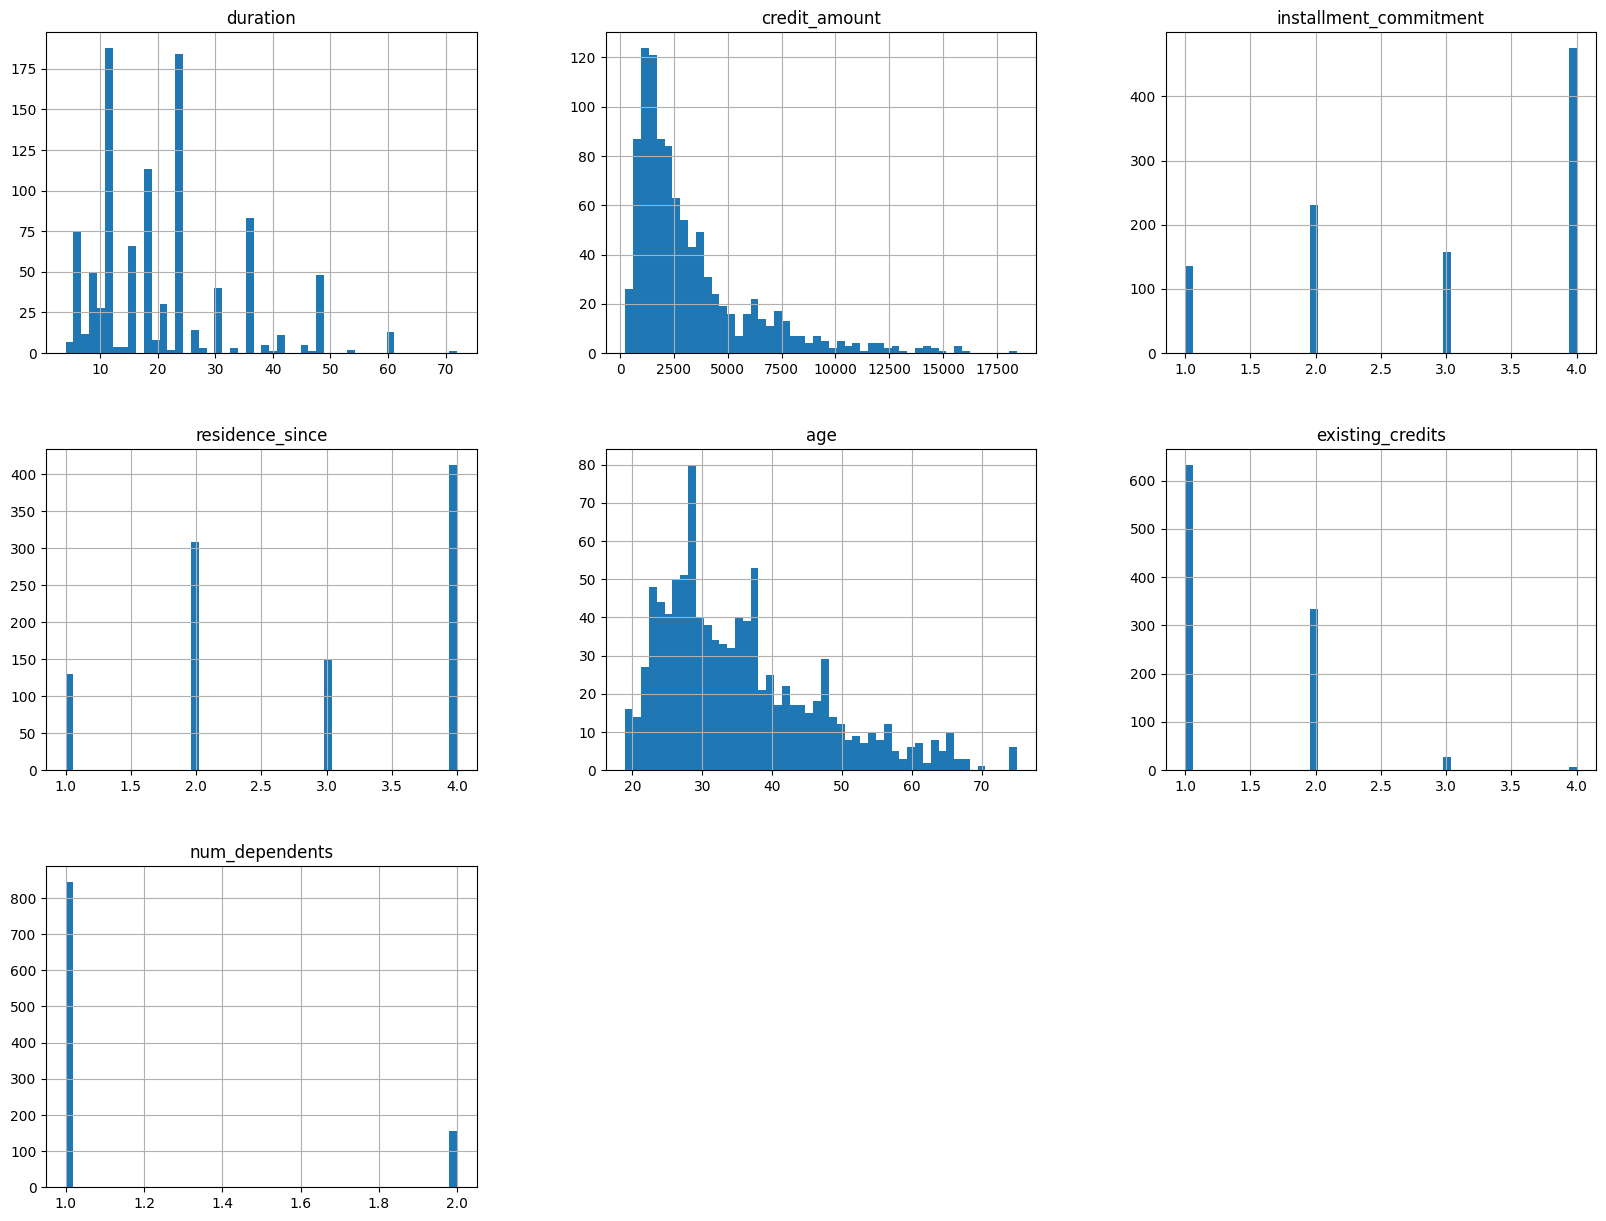

In [4]:
# plot the data histogram
data.hist(bins=50, figsize=(20,15))
plt.show()


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
#removing outliers using z-score
from scipy import stats
import numpy as np

# select only numeric columns
numeric_cols = data.select_dtypes(include=np.number)

# calculate z-scores
z = np.abs(stats.zscore(numeric_cols))
print(z)



     duration  credit_amount  installment_commitment  residence_since  \
0    1.236478       0.745131                0.918477         1.046987   
1    2.248194       0.949817                0.870183         0.765977   
2    0.738668       0.416562                0.870183         0.140505   
3    1.750384       1.634247                0.870183         1.046987   
4    0.256953       0.566664                0.024147         1.046987   
..        ...            ...                     ...              ...   
995  0.738668       0.544162                0.024147         1.046987   
996  0.754763       0.207612                0.918477         1.046987   
997  0.738668       0.874503                0.918477         1.046987   
998  1.999289       0.505528                0.918477         1.046987   
999  1.999289       0.462457                0.024147         1.046987   

          age  existing_credits  num_dependents  
0    2.766456          1.027079        0.428290  
1    1.191404          

In [7]:
# remove rows where z-score > 3
data = data[(z <3).all(axis=1)].reset_index(drop=True)
print(data.shape)


(952, 21)


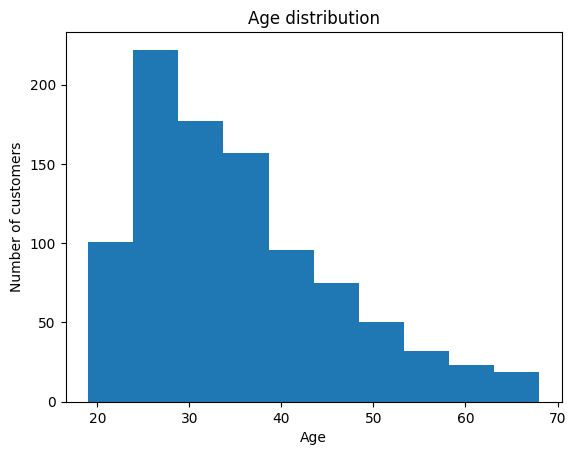

In [8]:
#plot age
plt.hist(data['age'],bins=10)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Age distribution')
plt.show()


In [9]:
# Using the describe function to get the statistical summary of the data
data.describe()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,20.066176,2943.470588,2.990546,2.829832,35.111345,1.399160,1.155462
std,10.871626,2228.724248,1.114343,1.103685,10.806986,0.544854,0.362535
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1346.750000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2239.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3751.000000,4.000000,4.000000,41.000000,2.000000,1.000000
max,54.000000,11590.000000,4.000000,4.000000,68.000000,3.000000,2.000000


### b. Using One hot encoding and label encoder to convert Object data type to int

In [10]:
cat_columns=data.select_dtypes(include=['object']).columns
for col in cat_columns:
 print(data[col].value_counts(),'\n')


no checking    383
<0             263
0<=X<200       244
>=200           62
Name: checking_status, dtype: int64 

existing paid                     507
critical/other existing credit    283
delayed previously                 81
all paid                           46
no credits/all paid                35
Name: credit_history, dtype: int64 

radio/tv               272
new car                219
furniture/equipment    179
used car                99
business                87
education               47
repairs                 20
domestic appliance      12
retraining               9
other                    8
Name: purpose, dtype: int64 

<100                577
no known savings    170
100<=X<500           95
500<=X<1000          62
>=1000               48
Name: savings_status, dtype: int64 

1<=X<4        325
>=7           238
<1            168
4<=X<7        166
unemployed     55
Name: employment, dtype: int64 

male single           513
female div/dep/mar    300
male mar/wid           91
m

In [11]:
#encoding class column with 0 and 1
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

#remove class column from cat_columns
cat_columns=cat_columns[:-1]
print(cat_columns)

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')


In [12]:
# check wether there is clear ordinal relationship among the Savings_Status and Employment
print(spearmanr(data['savings_status'],data['employment']))
# check wether there is clear ordinal relationship among the Savings_Status and Employment
if spearmanr(data['savings_status'],data['employment'])[1]<0.05:
    print('There is clear ordinal relationship among the Savings_Status and Employment')
else:
    print('There is no clear ordinal relationship among the Savings_Status and Employment')


SignificanceResult(statistic=0.05349798519048386, pvalue=0.0990112233999963)
There is no clear ordinal relationship among the Savings_Status and Employment


In [13]:
hot_columns=['personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job','own_telephone','purpose']
ordinal_columns=['employment','checking_status','credit_history','savings_status','foreign_worker']

In [14]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0


### c.Encoding categorical data cutomly to ensure that ordinal categorical data is encoded in the correct order

In [15]:
for col in ordinal_columns:
    data[col] = le.fit_transform(data[col])
for col in hot_columns:
    hot_encod=pd.get_dummies(data[col],prefix=col)
    data=data.drop(col,axis=1)

data=pd.concat([data,hot_encod],axis=1)
data.head(8)


,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,...,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car
0,1,6.0,1,1169.0,4,3,4.0,4.0,67.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0,48.0,3,5951.0,2,0,2.0,2.0,22.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,3,12.0,1,2096.0,2,1,2.0,3.0,49.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1,42.0,3,7882.0,2,1,2.0,4.0,45.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,1,24.0,2,4870.0,2,0,3.0,4.0,53.0,2.0,...,0,0,0,0,1,0,0,0,0,0
5,3,36.0,3,9055.0,4,0,2.0,4.0,35.0,1.0,...,0,0,1,0,0,0,0,0,0,0
6,3,24.0,3,2835.0,1,3,3.0,4.0,53.0,1.0,...,0,0,0,1,0,0,0,0,0,0
7,0,36.0,3,6948.0,2,0,2.0,2.0,35.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
data['foreign_worker'].value_counts()

1    917
0     35
Name: foreign_worker, dtype: int64

<Figure size 640x480 with 0 Axes>

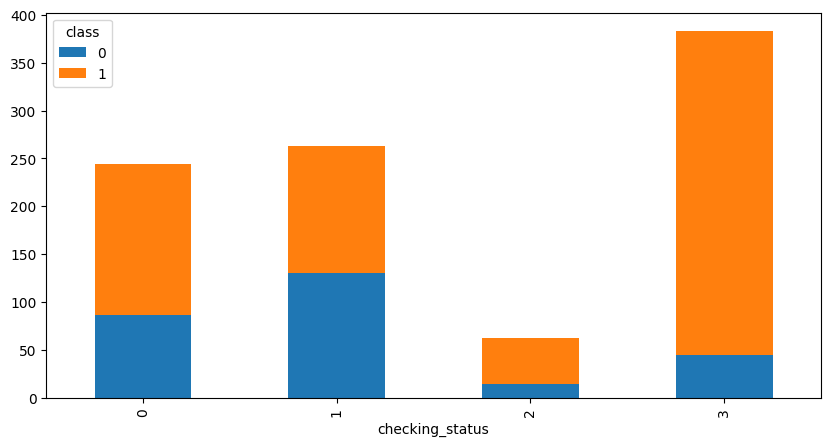

<Figure size 640x480 with 0 Axes>

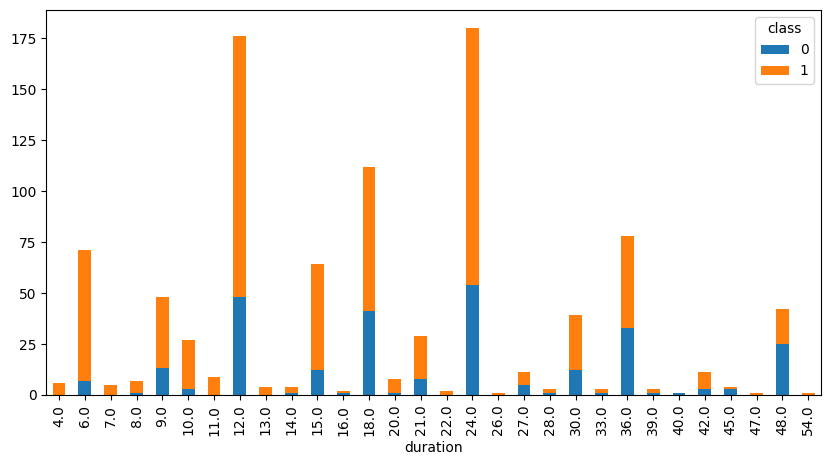

<Figure size 640x480 with 0 Axes>

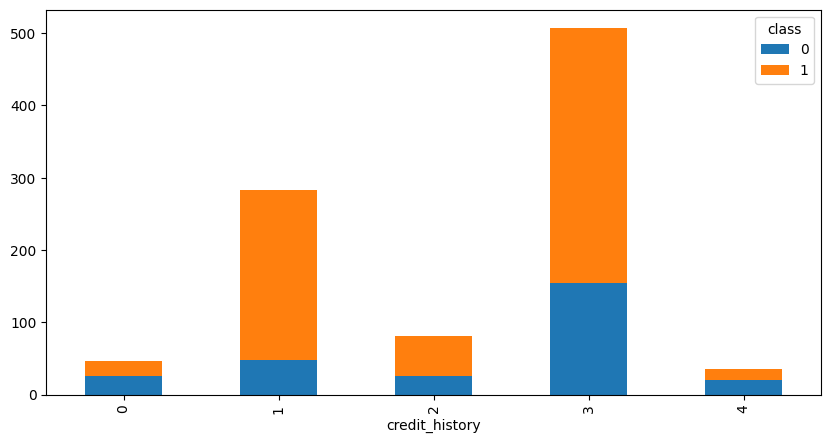

<Figure size 640x480 with 0 Axes>

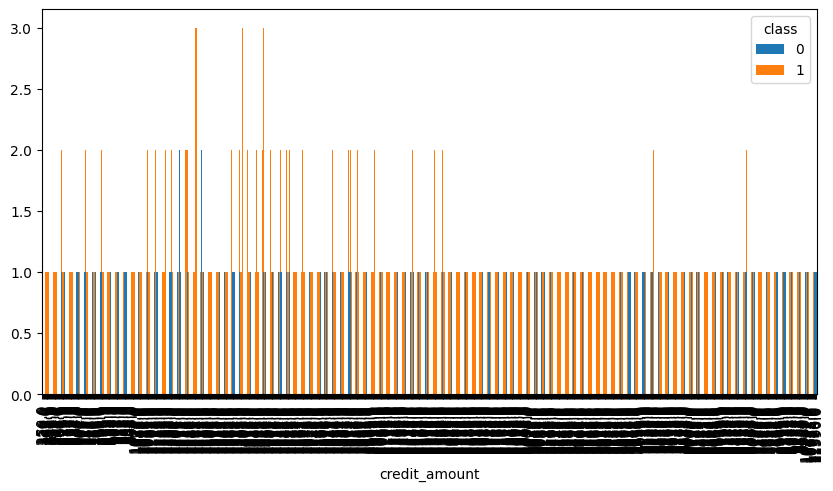

<Figure size 640x480 with 0 Axes>

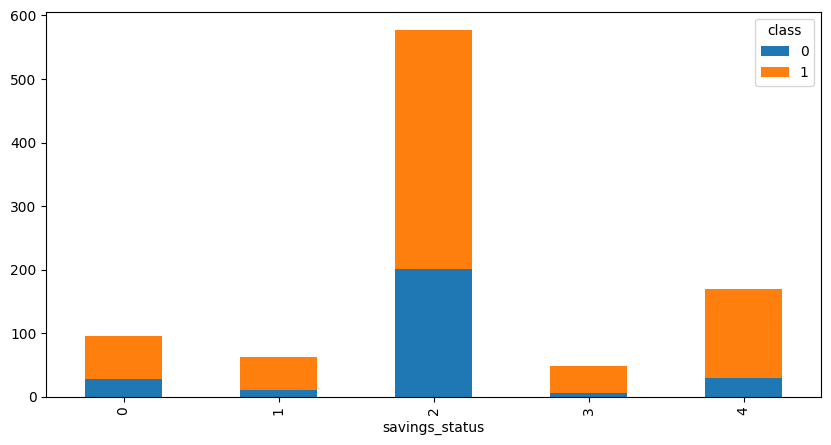

<Figure size 640x480 with 0 Axes>

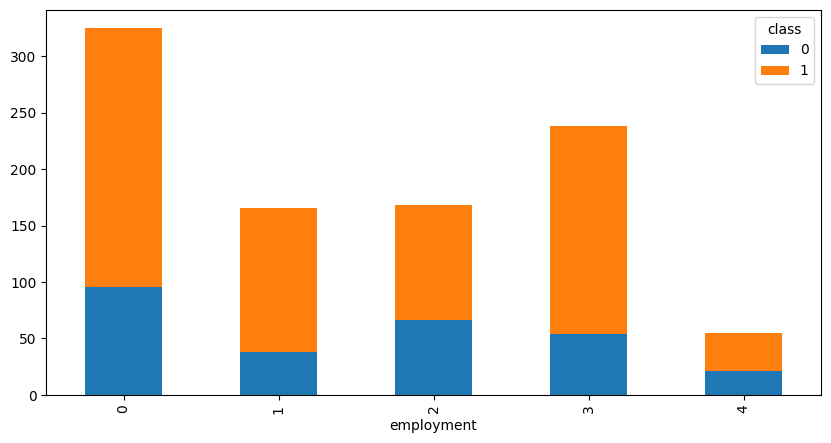

<Figure size 640x480 with 0 Axes>

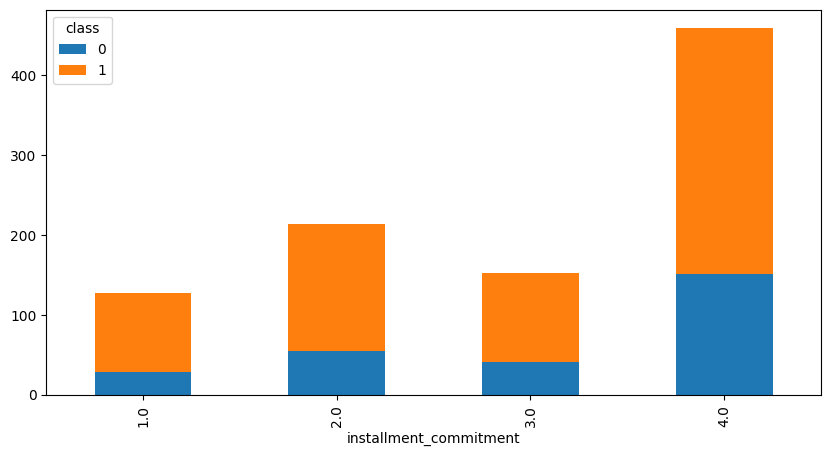

<Figure size 640x480 with 0 Axes>

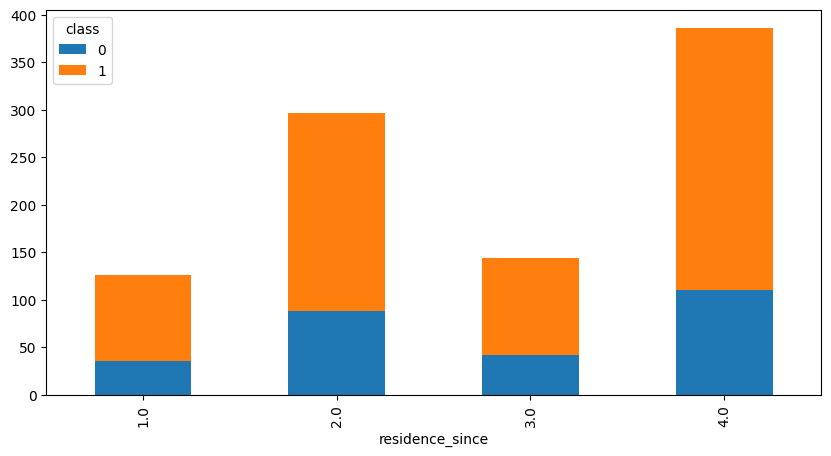

<Figure size 640x480 with 0 Axes>

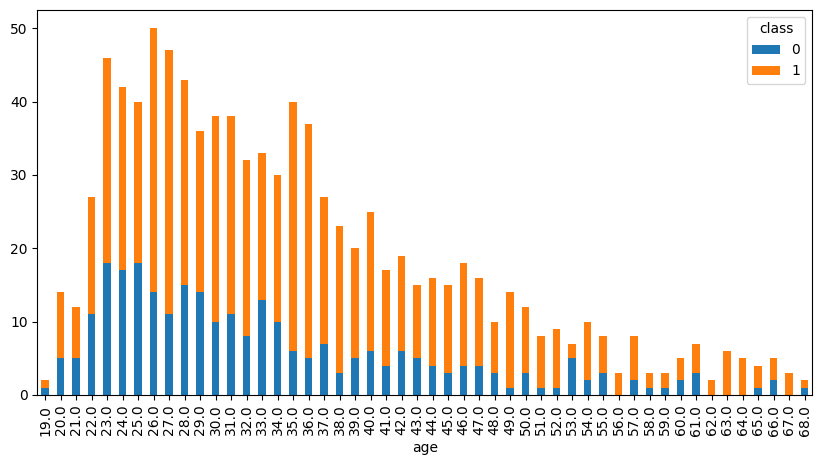

<Figure size 640x480 with 0 Axes>

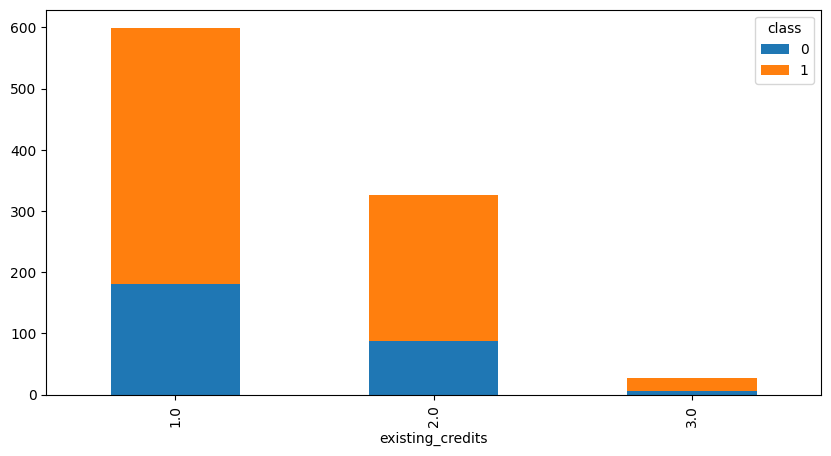

<Figure size 640x480 with 0 Axes>

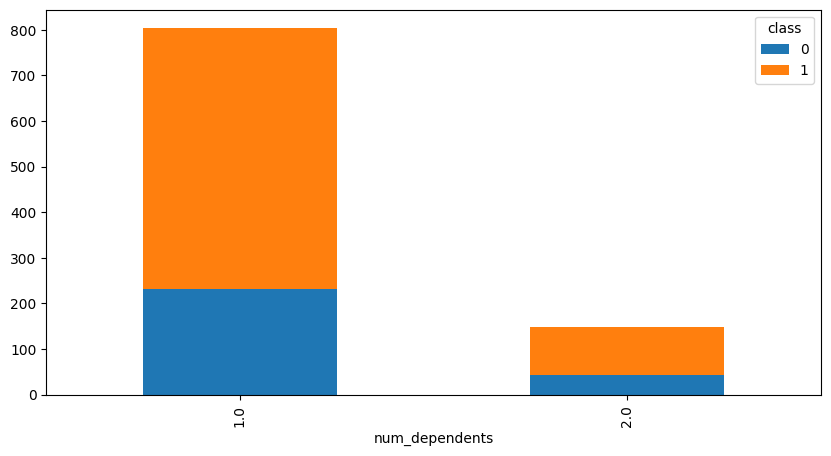

<Figure size 640x480 with 0 Axes>

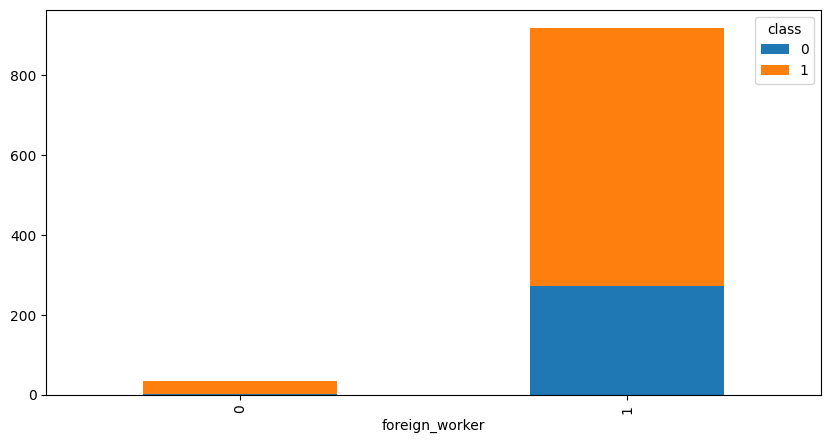

<Figure size 640x480 with 0 Axes>

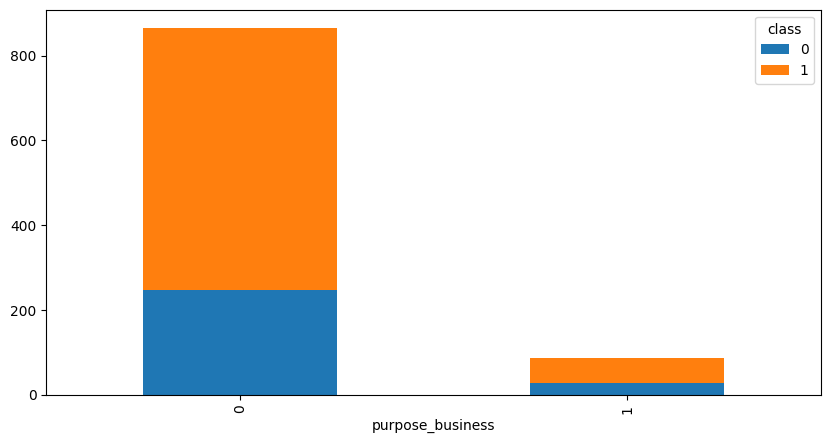

<Figure size 640x480 with 0 Axes>

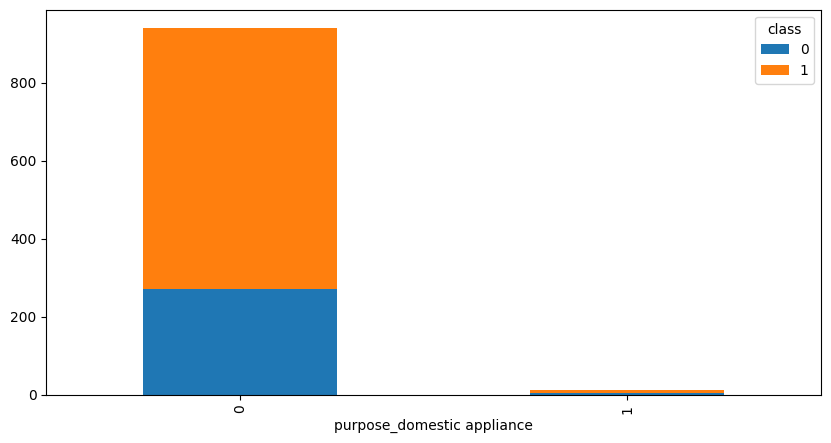

<Figure size 640x480 with 0 Axes>

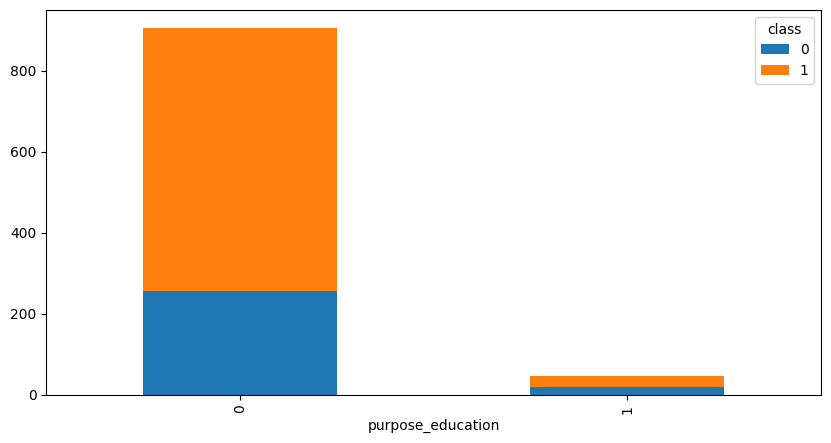

<Figure size 640x480 with 0 Axes>

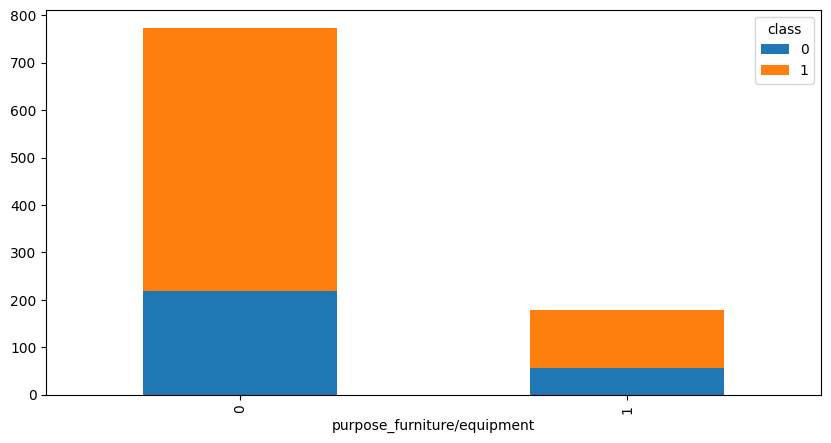

<Figure size 640x480 with 0 Axes>

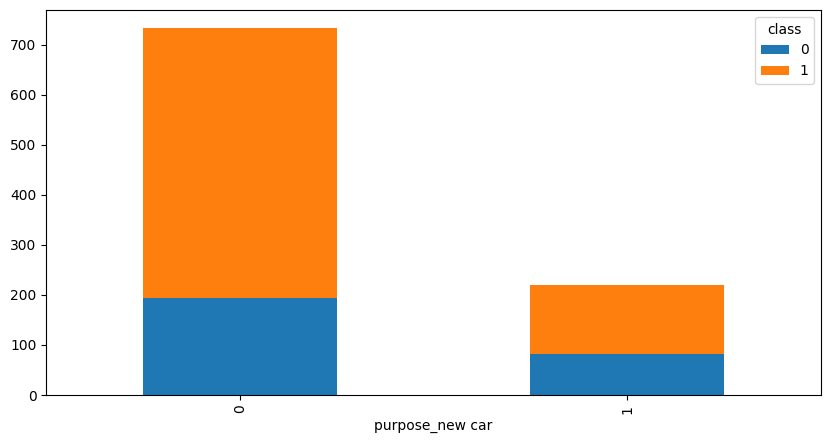

<Figure size 640x480 with 0 Axes>

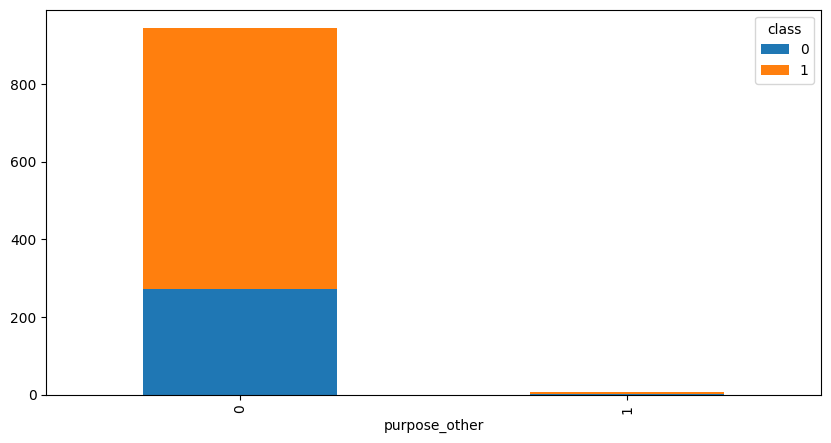

<Figure size 640x480 with 0 Axes>

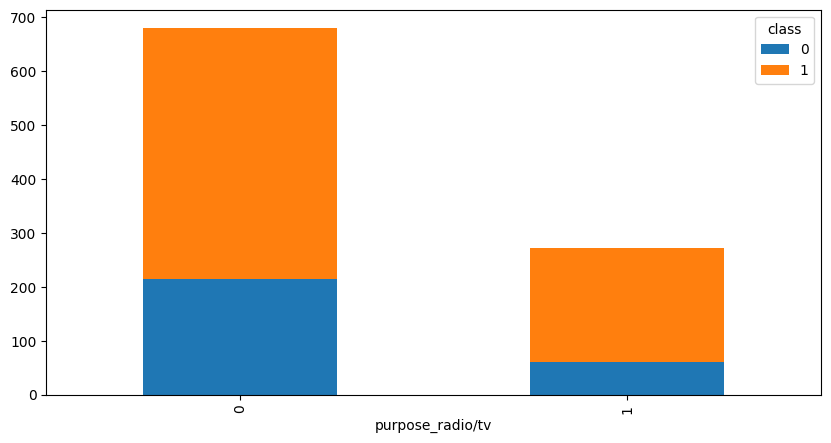

<Figure size 640x480 with 0 Axes>

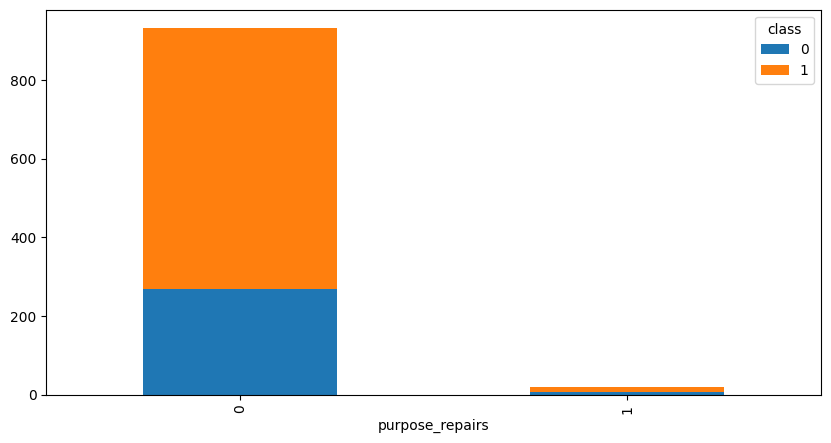

<Figure size 640x480 with 0 Axes>

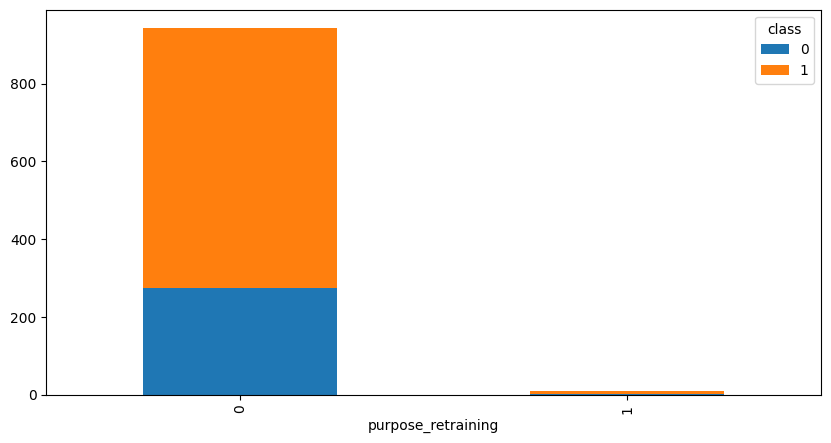

<Figure size 640x480 with 0 Axes>

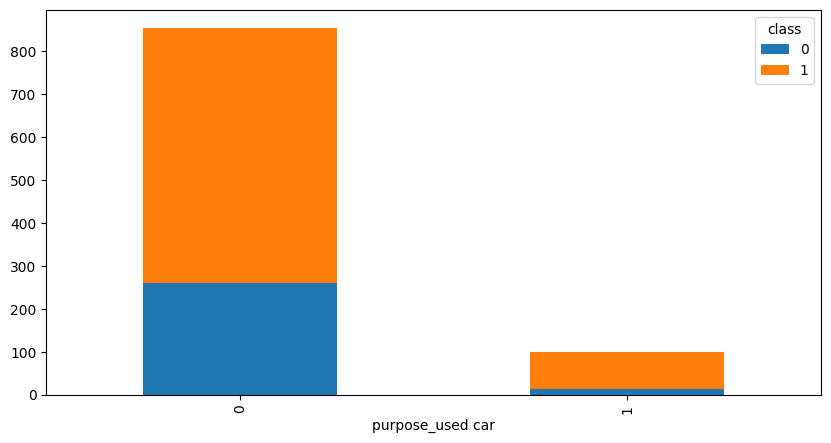

In [17]:
# visualise each column with class frequency
for col in data.columns:
    if col!='class':
        plt.figure()
        data.groupby([col,'class']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
        plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   checking_status              952 non-null    int32  
 1   duration                     952 non-null    float64
 2   credit_history               952 non-null    int32  
 3   credit_amount                952 non-null    float64
 4   savings_status               952 non-null    int32  
 5   employment                   952 non-null    int32  
 6   installment_commitment       952 non-null    float64
 7   residence_since              952 non-null    float64
 8   age                          952 non-null    float64
 9   existing_credits             952 non-null    float64
 10  num_dependents               952 non-null    float64
 11  foreign_worker               952 non-null    int32  
 12  class                        952 non-null    int32  
 13  purpose_business    

In [19]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   checking_status              952 non-null    int32  
 1   duration                     952 non-null    float64
 2   credit_history               952 non-null    int32  
 3   credit_amount                952 non-null    float64
 4   savings_status               952 non-null    int32  
 5   employment                   952 non-null    int32  
 6   installment_commitment       952 non-null    float64
 7   residence_since              952 non-null    float64
 8   age                          952 non-null    float64
 9   existing_credits             952 non-null    float64
 10  num_dependents               952 non-null    float64
 11  foreign_worker               952 non-null    int32  
 12  class                        952 non-null    int32  
 13  purpose_business    

 Dataset pre-processing(for research purpose)
 The dataset is pre-processed to remove the outliers and to balance the data.The data is balanced using the SMOTE method. The data is then split into train and test sets. The train set is used to train the model and the test set is used to evaluate the model.Also some features are dropped which are not important for the model.which is evaluated using chi square test,correlation matrix and feature importance.

In [20]:
# Numerical columns
num_columns=['duration','credit_amount' , 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
for col in num_columns:
    print(data[col].describe())
# scaling the numerical columns
scaler = StandardScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])
data.head()



count    952.000000
mean      20.066176
std       10.871626
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       54.000000
Name: duration, dtype: float64
count      952.000000
mean      2943.470588
std       2228.724248
min        250.000000
25%       1346.750000
50%       2239.500000
75%       3751.000000
max      11590.000000
Name: credit_amount, dtype: float64
count    952.000000
mean       2.990546
std        1.114343
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: installment_commitment, dtype: float64
count    952.000000
mean       2.829832
std        1.103685
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: residence_since, dtype: float64
count    952.000000
mean      35.111345
std       10.806986
min       19.000000
25%       27.000000
50%       33.000000
75%       41.000000
max       68.000000
Name: age, dtype: float64
count   

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,...,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car
0,1,-1.294523,1,-0.796601,4,3,0.906349,1.060795,2.952295,1.103335,...,0,0,0,0,0,0,1,0,0,0
1,0,2.570775,3,1.350149,2,0,-0.889373,-0.752269,-1.213866,-0.732985,...,0,0,0,0,0,0,1,0,0,0
2,3,-0.742338,1,-0.380449,2,1,-0.889373,0.154263,1.285831,-0.732985,...,0,0,1,0,0,0,0,0,0,0
3,1,2.018590,3,2.217020,2,1,-0.889373,1.060795,0.915505,-0.732985,...,0,0,0,1,0,0,0,0,0,0
4,1,0.362033,2,0.864863,2,0,0.008488,1.060795,1.656156,1.103335,...,0,0,0,0,1,0,0,0,0,0


<Axes: >

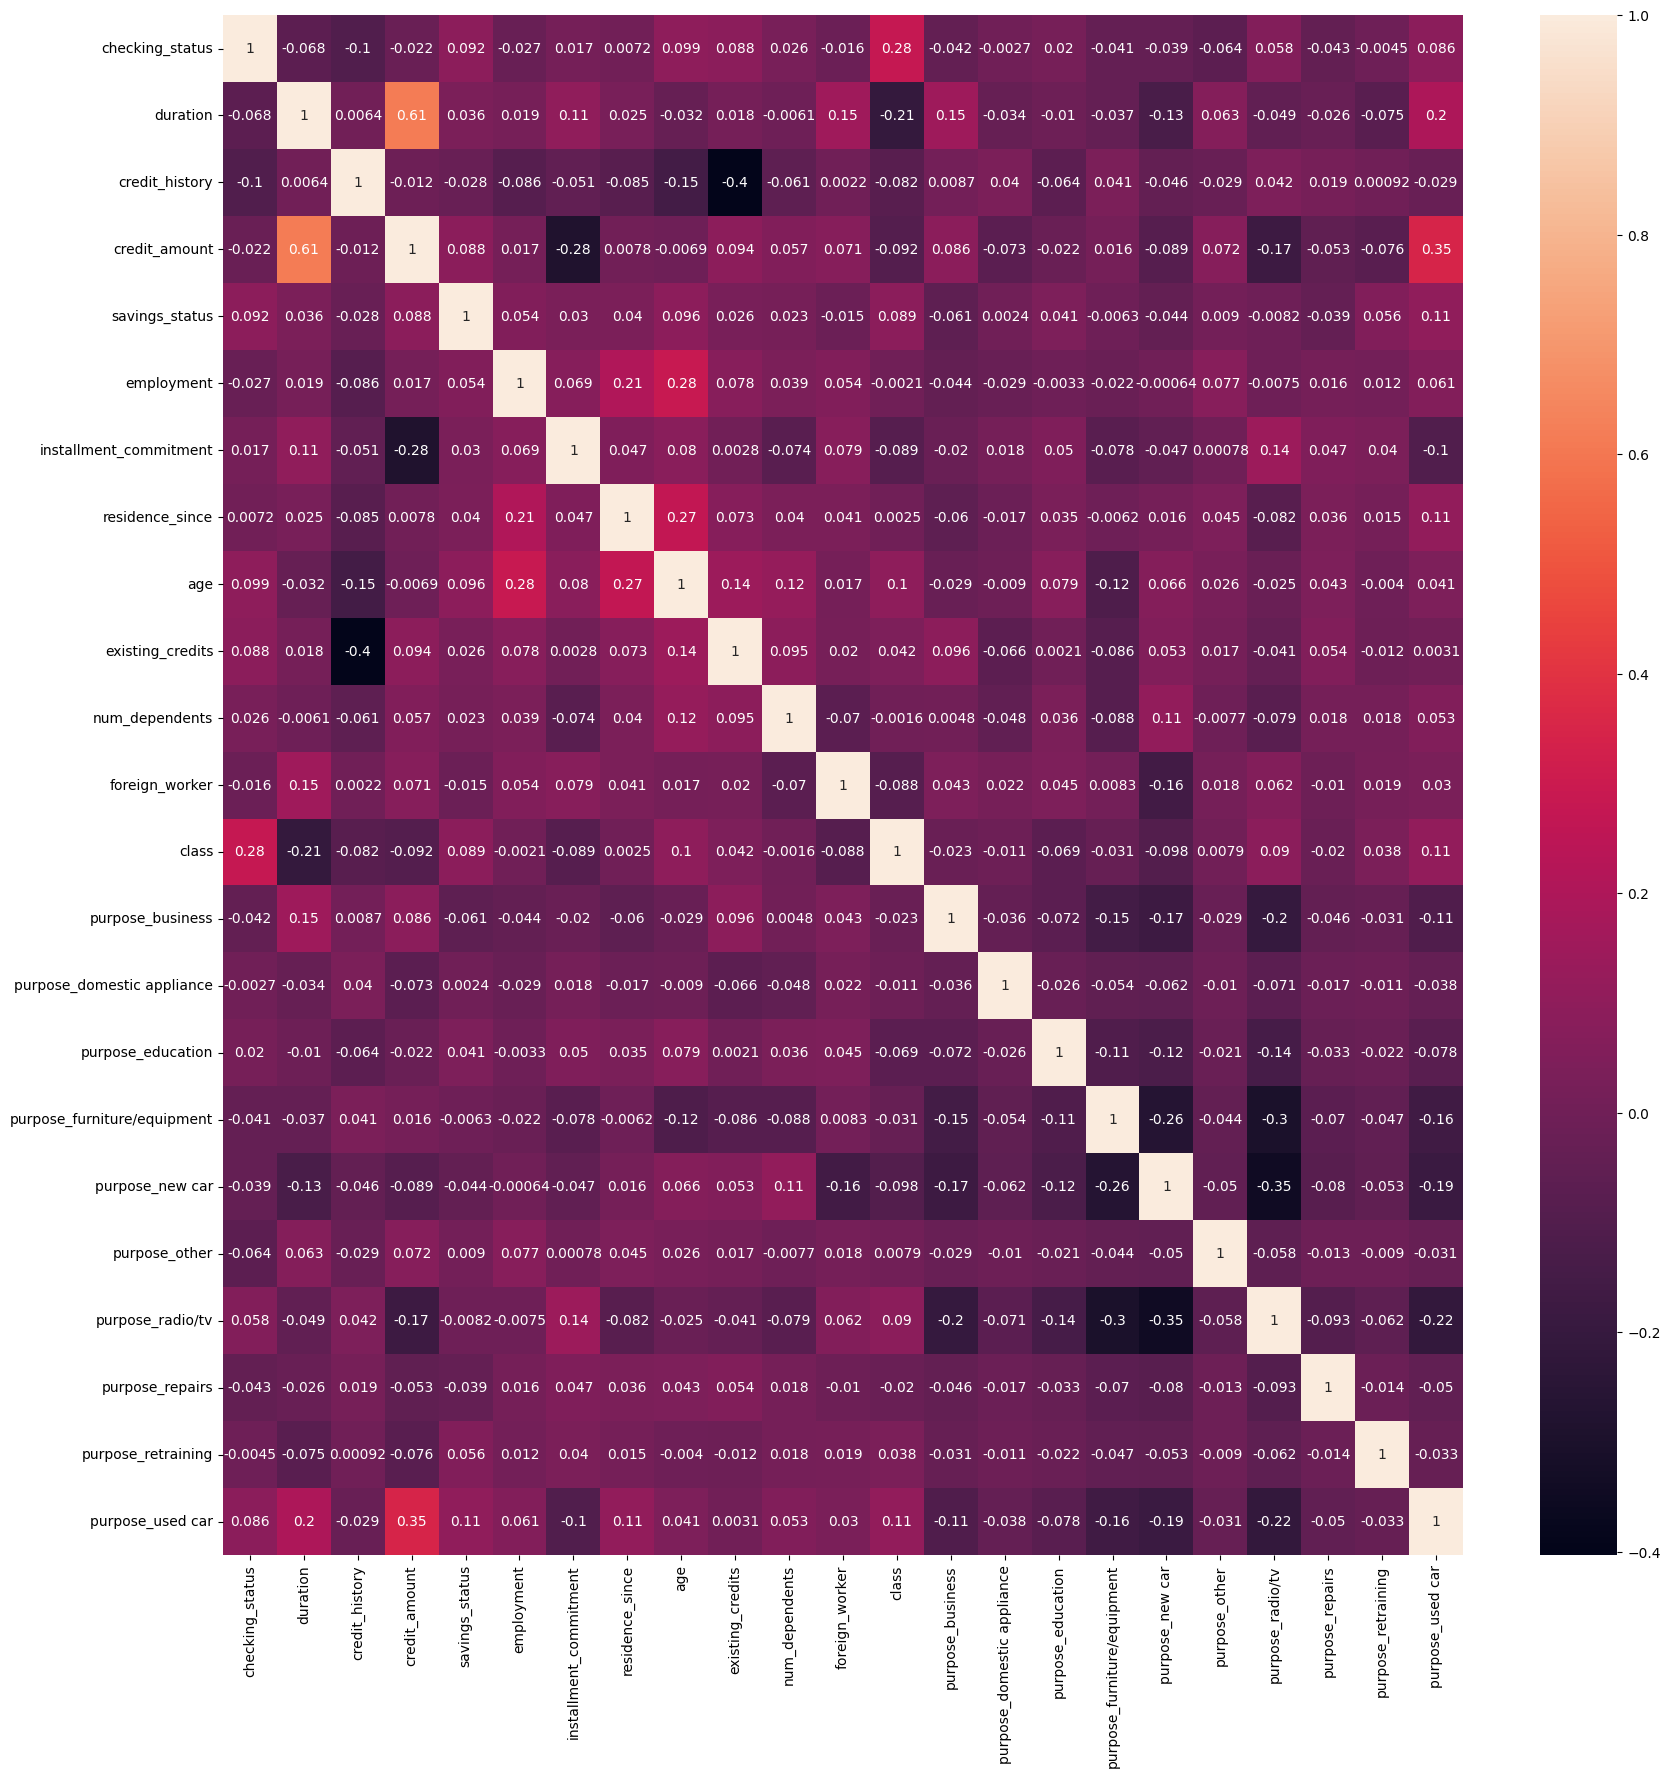

In [21]:
# correlation matrix for categorical columns
corr_matrix=data.corr()
corr_matrix['class'].sort_values(ascending=False)
#plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   checking_status              952 non-null    int32  
 1   duration                     952 non-null    float64
 2   credit_history               952 non-null    int32  
 3   credit_amount                952 non-null    float64
 4   savings_status               952 non-null    int32  
 5   employment                   952 non-null    int32  
 6   installment_commitment       952 non-null    float64
 7   residence_since              952 non-null    float64
 8   age                          952 non-null    float64
 9   existing_credits             952 non-null    float64
 10  num_dependents               952 non-null    float64
 11  foreign_worker               952 non-null    int32  
 12  class                        952 non-null    int32  
 13  purpose_business    

In [23]:
data.head(2)

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,...,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car
0,1,-1.294523,1,-0.796601,4,3,0.906349,1.060795,2.952295,1.103335,...,0,0,0,0,0,0,1,0,0,0
1,0,2.570775,3,1.350149,2,0,-0.889373,-0.752269,-1.213866,-0.732985,...,0,0,0,0,0,0,1,0,0,0


In [24]:
data.drop(['purpose_repairs','purpose_furniture/equipment','purpose_domestic appliance'], axis=1, inplace=True)


In [25]:
data.head(2)

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,class,purpose_business,purpose_education,purpose_new car,purpose_other,purpose_radio/tv,purpose_retraining,purpose_used car
0,1,-1.294523,1,-0.796601,4,3,0.906349,1.060795,2.952295,1.103335,-0.429045,1,1,0,0,0,0,1,0,0
1,0,2.570775,3,1.350149,2,0,-0.889373,-0.752269,-1.213866,-0.732985,-0.429045,1,0,0,0,0,0,1,0,0


In [26]:
data['class'].value_counts()

1    677
0    275
Name: class, dtype: int64

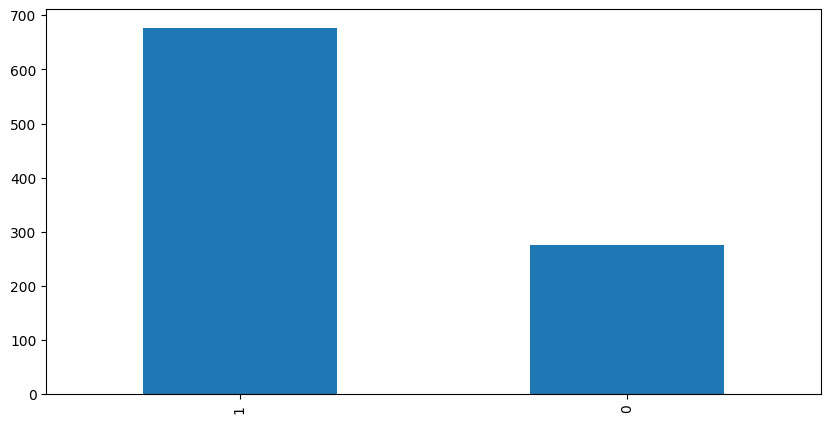

In [27]:
# plot bar graph of class column
data['class'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()



In [28]:
#chi square test
from scipy.stats import chi2_contingency
for col in data.columns:
    if col!='class':
        print(col)
        print(chi2_contingency(pd.crosstab(data[col],data['class'])),'\n')

checking_status
Chi2ContingencyResult(statistic=114.79040265165862, pvalue=1.0214303449431689e-24, dof=3, expected_freq=array([[ 70.48319328, 173.51680672],
       [ 75.97163866, 187.02836134],
       [ 17.90966387,  44.09033613],
       [110.6355042 , 272.3644958 ]])) 

duration
Chi2ContingencyResult(statistic=71.83536266559828, pvalue=1.6937709881925606e-05, dof=29, expected_freq=array([[  1.73319328,   4.26680672],
       [ 20.50945378,  50.49054622],
       [  1.44432773,   3.55567227],
       [  2.02205882,   4.97794118],
       [ 13.86554622,  34.13445378],
       [  7.79936975,  19.20063025],
       [  2.59978992,   6.40021008],
       [ 50.84033613, 125.15966387],
       [  1.15546218,   2.84453782],
       [  1.15546218,   2.84453782],
       [ 18.48739496,  45.51260504],
       [  0.57773109,   1.42226891],
       [ 32.35294118,  79.64705882],
       [  2.31092437,   5.68907563],
       [  8.37710084,  20.62289916],
       [  0.57773109,   1.42226891],
       [ 51.99579832, 1

checking_status
1.0214303449431689e-24 

duration
1.6937709881925606e-05 

credit_history
4.916747311252596e-11 

credit_amount
0.416034742954478 

savings_status
2.357241839972288e-06 

employment
0.0009506238854320408 

installment_commitment
0.050001089227745925 

residence_since
0.9756614582859227 

age
0.27286793211386584 

existing_credits
0.4342172281682377 

num_dependents
1.0 

foreign_worker
0.012009395783656663 

purpose_business
0.5566601137127131 

purpose_education
0.05056186931193878 

purpose_new car
0.0034005868710239935 

purpose_other
1.0 

purpose_radio/tv
0.00688717333111997 

purpose_retraining
0.4163931786096118 

purpose_used car
0.0009580700491848916 



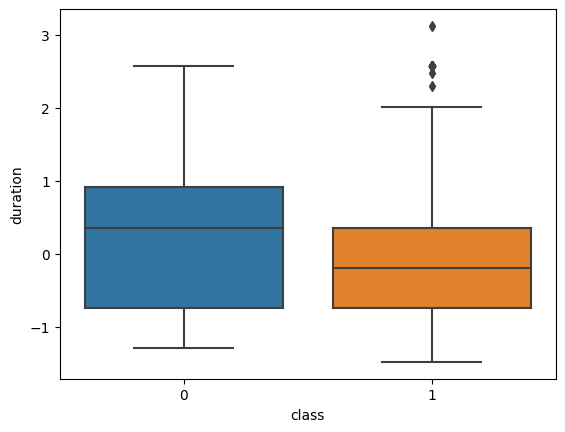

In [29]:
# plot chi square test p value
for col in data.columns:
    if col!='class':
        print(col)
        print(chi2_contingency(pd.crosstab(data[col],data['class']))[1],'\n')
#plot in sns
sns.boxplot(x='class',y='duration',data=data)
plt.show()


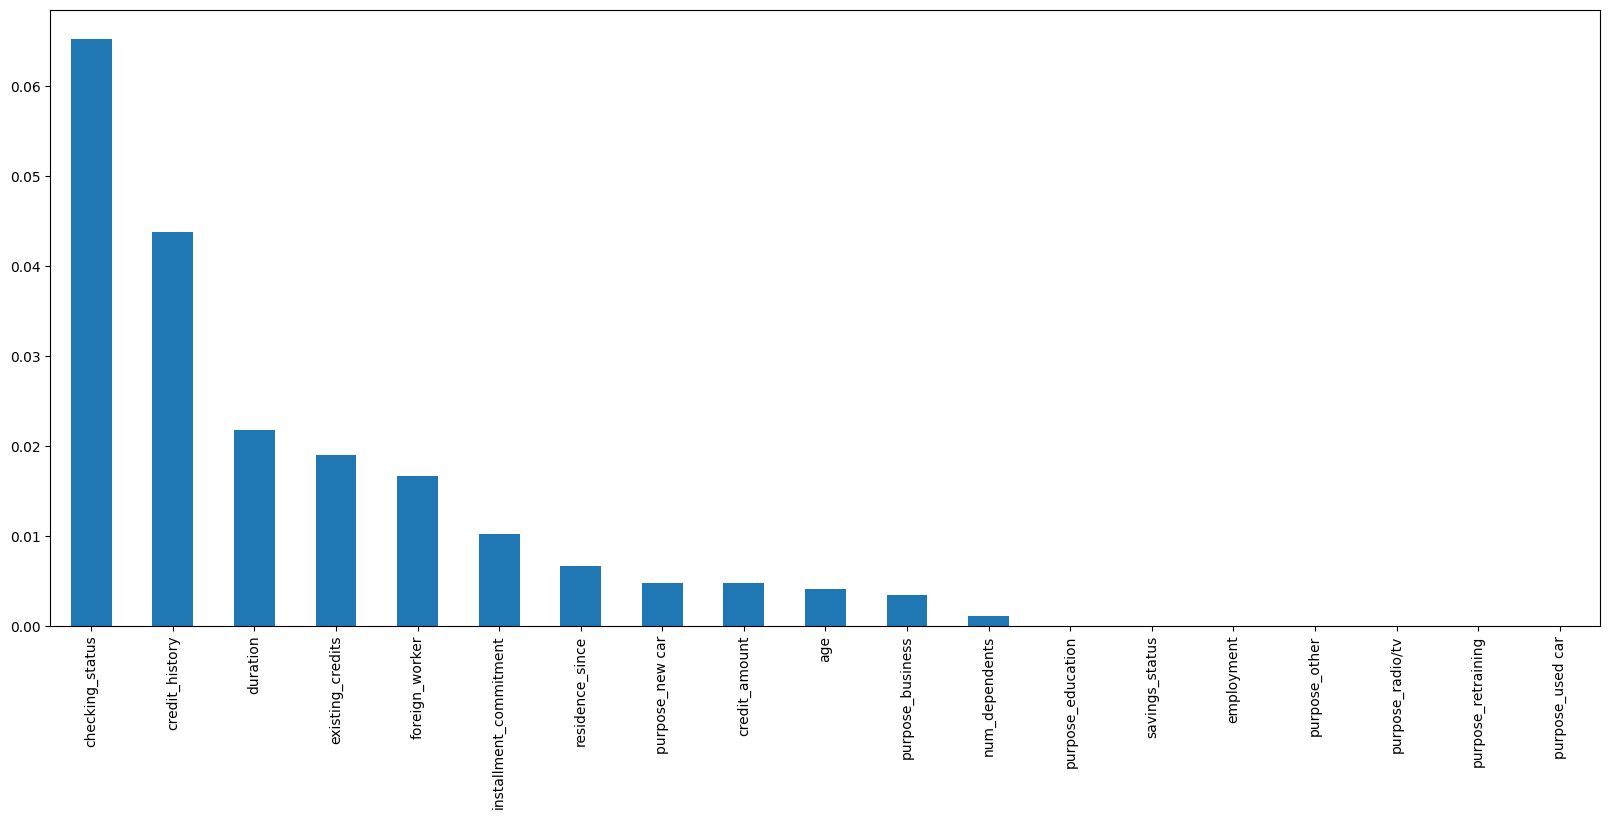

checking_status           0.065275
credit_history            0.043824
duration                  0.021774
existing_credits          0.019009
foreign_worker            0.016617
installment_commitment    0.010201
residence_since           0.006587
purpose_new car           0.004774
credit_amount             0.004744
age                       0.004051
purpose_business          0.003391
num_dependents            0.001104
purpose_education         0.000016
savings_status            0.000000
employment                0.000000
purpose_other             0.000000
purpose_radio/tv          0.000000
purpose_retraining        0.000000
purpose_used car          0.000000
dtype: float64


In [30]:
# mutual information
from sklearn.feature_selection import mutual_info_classif
X_Blnk=data.drop('class',axis=1)
y_Blnk=data['class']
mutual_info = mutual_info_classif(X_Blnk, y_Blnk)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_Blnk.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()
#printing the mutual information
print(mutual_info.sort_values(ascending=False))



In [31]:
# Columns to drop based on mutual information score and chi square test results
cols_to_drop = ['property_magnitude_car', 'purpose_radio/TV', 'purpose_repairs', 'purpose_furniture/equipment', 'purpose_domestic appliance', 'purpose_education', 'purpose_business']
cols_to_drop = [col for col in cols_to_drop if col in data.columns]
data.drop(cols_to_drop, axis=1, inplace=True)
data.head(2)

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,class,purpose_new car,purpose_other,purpose_radio/tv,purpose_retraining,purpose_used car
0,1,-1.294523,1,-0.796601,4,3,0.906349,1.060795,2.952295,1.103335,-0.429045,1,1,0,0,1,0,0
1,0,2.570775,3,1.350149,2,0,-0.889373,-0.752269,-1.213866,-0.732985,-0.429045,1,0,0,0,1,0,0


# Since the data is imbalanced, we will use ADAsyn to balance the data



In [32]:
# # Using adaSyn to balance the data
X = data.drop('class', axis=1)
y = data['class']
# Applying ADASYN to balance the data
ada = ADASYN(random_state=42, sampling_strategy='auto', n_neighbors=5)
X_res, y_res = ada.fit_resample(X, y)
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res, columns=['class'])
data = pd.concat([X_res, y_res], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1288 non-null   int32  
 1   duration                1288 non-null   float64
 2   credit_history          1288 non-null   int32  
 3   credit_amount           1288 non-null   float64
 4   savings_status          1288 non-null   int32  
 5   employment              1288 non-null   int32  
 6   installment_commitment  1288 non-null   float64
 7   residence_since         1288 non-null   float64
 8   age                     1288 non-null   float64
 9   existing_credits        1288 non-null   float64
 10  num_dependents          1288 non-null   float64
 11  foreign_worker          1288 non-null   int32  
 12  purpose_new car         1288 non-null   uint8  
 13  purpose_other           1288 non-null   uint8  
 14  purpose_radio/tv        1288 non-null   

In [33]:
data.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,purpose_new car,purpose_other,purpose_radio/tv,purpose_retraining,purpose_used car,class
0,1,-1.294523,1,-0.796601,4,3,0.906349,1.060795,2.952295,1.103335,-0.429045,1,0,0,1,0,0,1
1,0,2.570775,3,1.350149,2,0,-0.889373,-0.752269,-1.213866,-0.732985,-0.429045,1,0,0,1,0,0,0
2,3,-0.742338,1,-0.380449,2,1,-0.889373,0.154263,1.285831,-0.732985,2.330758,1,0,0,0,0,0,1
3,1,2.018590,3,2.217020,2,1,-0.889373,1.060795,0.915505,-0.732985,2.330758,1,0,0,0,0,0,1
4,1,0.362033,2,0.864863,2,0,0.008488,1.060795,1.656156,1.103335,2.330758,1,1,0,0,0,0,0


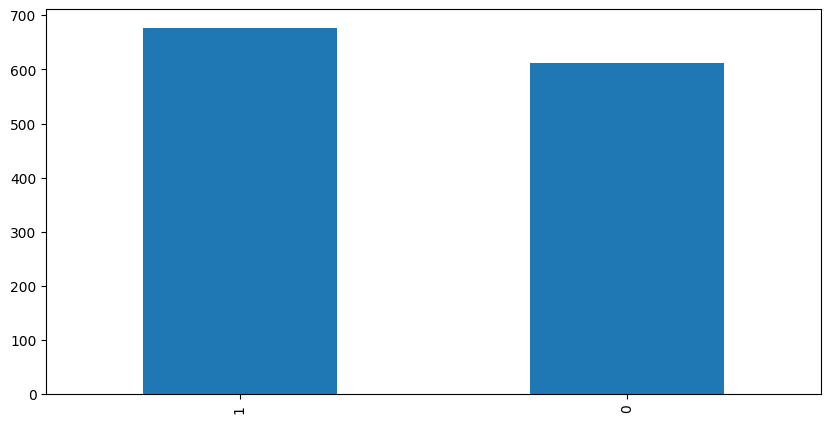

In [34]:
# plot bar graph of class column
data['class'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()


In [35]:
# sacling using standard scaler
scaler = StandardScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1288 non-null   int32  
 1   duration                1288 non-null   float64
 2   credit_history          1288 non-null   int32  
 3   credit_amount           1288 non-null   float64
 4   savings_status          1288 non-null   int32  
 5   employment              1288 non-null   int32  
 6   installment_commitment  1288 non-null   float64
 7   residence_since         1288 non-null   float64
 8   age                     1288 non-null   float64
 9   existing_credits        1288 non-null   float64
 10  num_dependents          1288 non-null   float64
 11  foreign_worker          1288 non-null   int32  
 12  purpose_new car         1288 non-null   uint8  
 13  purpose_other           1288 non-null   uint8  
 14  purpose_radio/tv        1288 non-null   

## 2.DATA SPLIT

In [36]:
# split the data into train and test
X=data.drop('class',axis=1)
y=data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. MODEL BUILDING

### a. SVM CLASSIFIER

In [37]:
# increasing reccall score of SVM by changing the class weight and using rbf kernel
# Reducing the false negative rate is the main objective of this project
# so we are using recall score as the metric to evaluate the model

svc=SVC(kernel='rbf',random_state=10,C=3,gamma=0.3,max_iter=200,tol=0.001)
svc.fit(X_train,y_train)
y_pred_sv=svc.predict(X_test)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_sv))


accuracy score: 0.7945736434108527


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


***Here our primary goal is to predict true positives and  want to maximize the number of correctly predicted positive instances in badcases(0) while minimizing false negatives, so we focused on optimizing the model's Recall (Sensitivity)***

 **Reducing the false negative rate is a common and important objective in this projects, especially when the consequences of missing positive cases (false negatives) are significant. Using the recall score as the metric to evaluate your model is a suitable approach in this case.Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions (correctly identified positive cases) out of all actual positive instances (true positives + false negatives).**

***The recall score is calculated as follows:***


***Recall = TP / (TP + FN)***


***where TP is the number of true positives and FN is the number of false negatives.***

***The recall score is a good metric to use when the cost of false negatives is high. For example, in a cancer screening test, a false negative means that a sick patient is not referred to a specialist and does not receive treatment.***

***In this case study,we increased the recall score of '0' that are bad cases for credit risk thus able  to catch more true '0'(bad cases) to reduce credit risk***

In [38]:
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_sv))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_sv))
print('\n')

Confusion matrix:
 [[101  19]
 [ 34 104]]


Classification report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       120
           1       0.85      0.75      0.80       138

    accuracy                           0.79       258
   macro avg       0.80      0.80      0.79       258
weighted avg       0.80      0.79      0.79       258





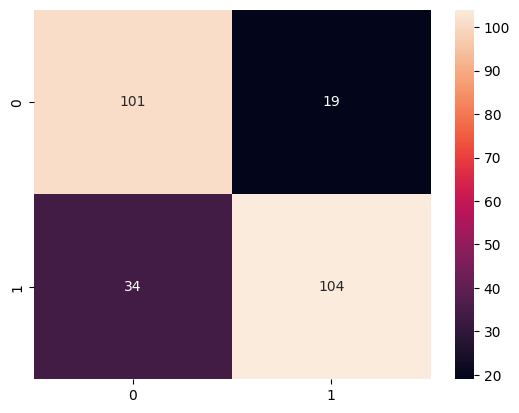

In [39]:
# sns heatmap
sns.heatmap(confusion_matrix(y_test,y_pred_sv),annot=True,fmt='d')
plt.show()


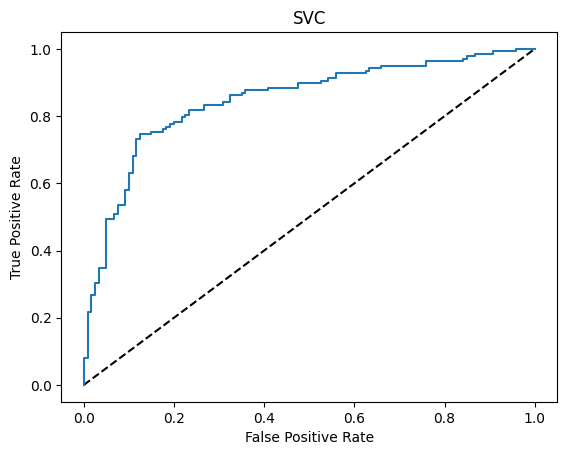

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
#AUC ROC curve

y_pred_prob=svc.decision_function(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.show()

### b. DECISION TREE CLASSIFIER

In [41]:
#model descision tree
# Increase recall score by changing the max_depth
dt2=DecisionTreeClassifier(max_depth=2,random_state=20,criterion='gini')
dt2.fit(X_train,y_train)
y_pred_dt=dt2.predict(X_test)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_dt))


accuracy score: 0.7248062015503876


In [42]:
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_dt))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_dt))
print('\n')


Confusion matrix:
 [[96 24]
 [47 91]]


Classification report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73       120
           1       0.79      0.66      0.72       138

    accuracy                           0.72       258
   macro avg       0.73      0.73      0.72       258
weighted avg       0.74      0.72      0.72       258





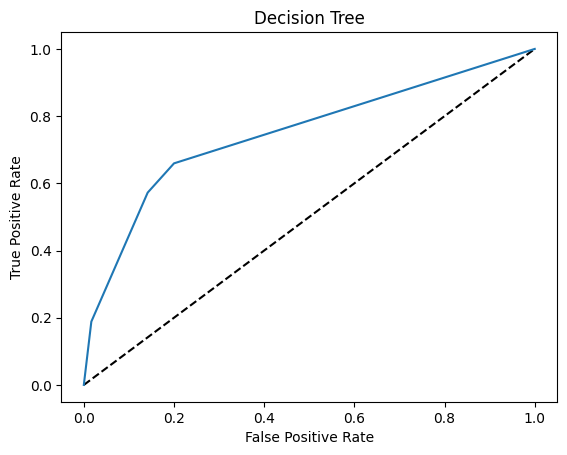

In [43]:
#AUC ROC curve
y_pred_prob=dt2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.show()


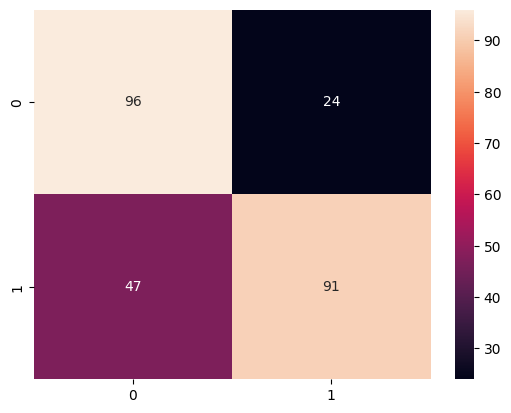

In [44]:
# sns heatmap
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='d')
plt.show()

### c. Random forest

In [45]:
rf=RandomForestClassifier(max_depth=20,n_estimators=100,criterion='entropy')
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_rf))


accuracy score: 0.810077519379845


In [46]:
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_rf))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_rf))
print('\n')

Confusion matrix:
 [[ 96  24]
 [ 25 113]]


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       120
           1       0.82      0.82      0.82       138

    accuracy                           0.81       258
   macro avg       0.81      0.81      0.81       258
weighted avg       0.81      0.81      0.81       258





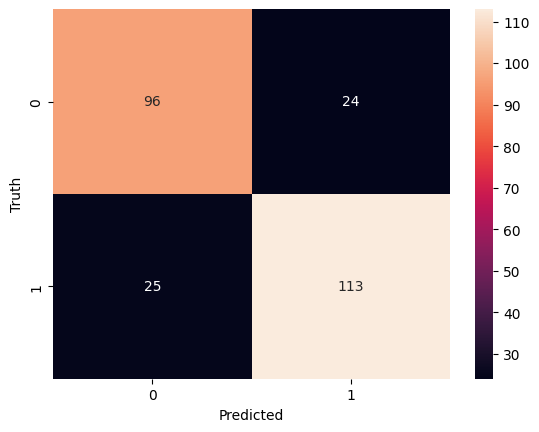

In [47]:
#plot confusion matrix with sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



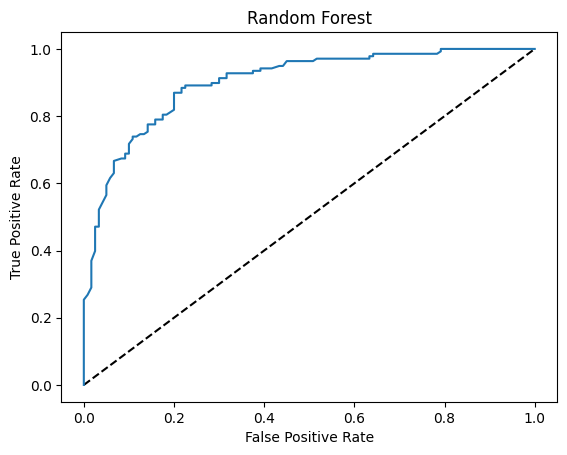

In [48]:
#AUC ROC curve
y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show()


### d. XGBOOST

In [49]:
xg=XGBClassifier(learning_rate=0.5,max_depth=10,n_estimators=55,random_state=12)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_xg))

accuracy score: 0.8372093023255814


In [50]:
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_xg))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_xg))
print('\n')

Confusion matrix:
 [[ 95  25]
 [ 17 121]]


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       120
           1       0.83      0.88      0.85       138

    accuracy                           0.84       258
   macro avg       0.84      0.83      0.84       258
weighted avg       0.84      0.84      0.84       258





Text(0.5, 1.0, 'Confusion Matrix')

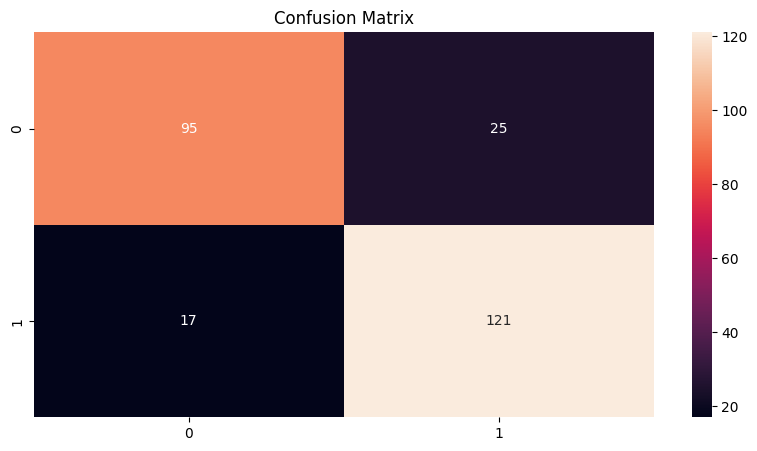

In [51]:
# plot sns confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')


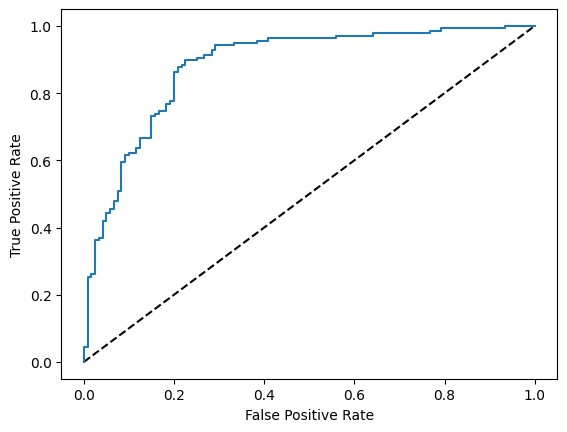

In [52]:
#AUC ROC curve
y_pred_prob=xg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('X')
plt.show()


### e. K-Nearest Neighbors

In [53]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,p=2,n_jobs=-1)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_knn))


accuracy score: 0.748062015503876


In [54]:
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_knn))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_knn))
print('\n')


Confusion matrix:
 [[117   3]
 [ 62  76]]


Classification report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       120
           1       0.96      0.55      0.70       138

    accuracy                           0.75       258
   macro avg       0.81      0.76      0.74       258
weighted avg       0.82      0.75      0.74       258





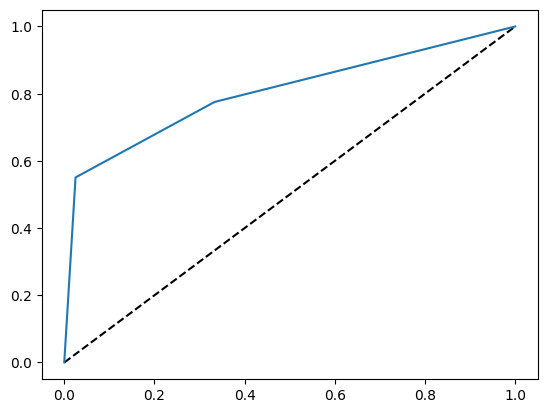

In [55]:
#AUC ROC curve
y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')


Text(0.5, 1.0, 'Confusion Matrix')

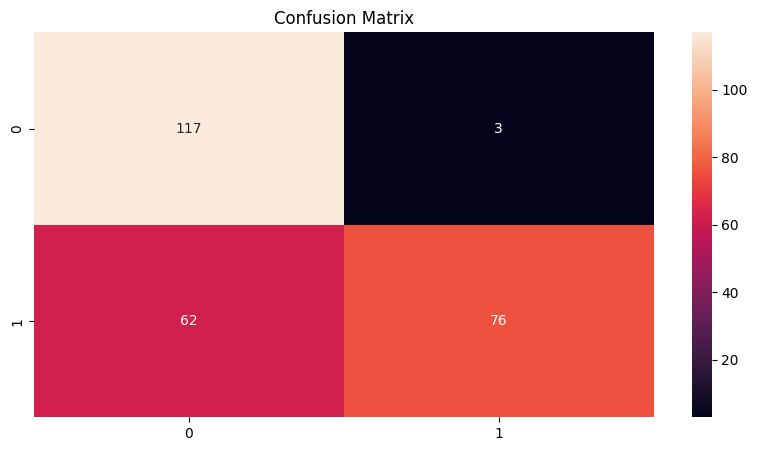

In [56]:
#sns plot of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')


In [57]:
# Using neural network to increase the recall score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/100
52/52 [==============================] - 2s 7ms/step - loss: 0.7354 - accuracy: 0.5068 - val_loss: 0.6633 - val_accuracy: 0.5581
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5922 - val_loss: 0.6099 - val_accuracy: 0.6667
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6379 - val_loss: 0.5888 - val_accuracy: 0.6783
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6670 - val_loss: 0.5800 - val_accuracy: 0.6744
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6728 - val_loss: 0.5720 - val_accuracy: 0.6822
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6883 - val_loss: 0.5632 - val_accuracy: 0.6899
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6825 - val_loss: 0.5574 - val_accuracy: 0.7093
Epoch 8/100
5

In [58]:
# for fitting ,callbacks=[es,mc] of the ann model
#  load the saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')
# evaluate the model
_, saved_accuracy = saved_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (saved_accuracy*100))
#test accuracy
y_pred_nn=saved_model.predict(X_test)
# convert probabilities to binary predictions using a threshold value of 0.5
y_pred_nn = (y_pred_nn > 0.5).astype(int)
#accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_nn))
#confusion matrix
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_nn))
print('\n')
#classification report
print('Classification report:\n',classification_report(y_test,y_pred_nn))
print('\n')


9/9 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8488
Accuracy: 84.88
9/9 [==============================] - 0s 991us/step
accuracy score: 0.8488372093023255
Confusion matrix:
 [[107  13]
 [ 26 112]]


Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       120
           1       0.90      0.81      0.85       138

    accuracy                           0.85       258
   macro avg       0.85      0.85      0.85       258
weighted avg       0.85      0.85      0.85       258





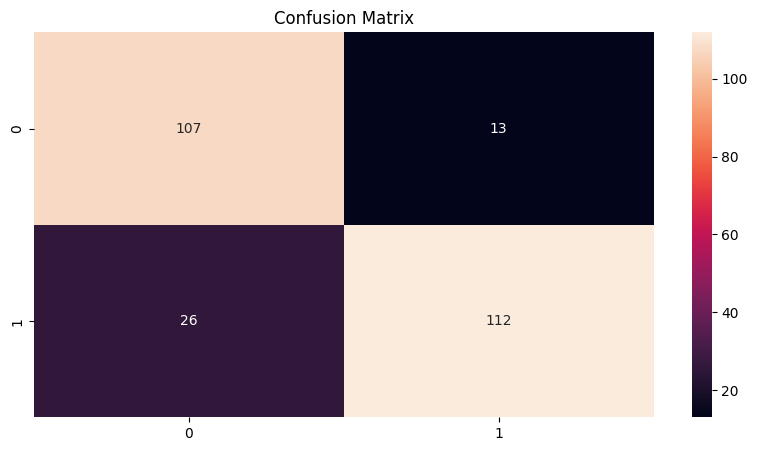

In [59]:
# Confusion matrix with sns 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()


9/9 [==============================] - 0s 1ms/step
AUC: 0.918


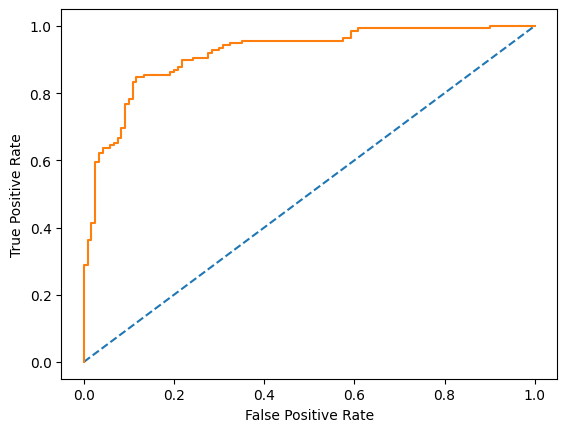

In [60]:
#auc and roc curve with label axis
# predict probabilities
probs = saved_model.predict(X_test)
# keep probabilities for both out comes
probs = probs[:, 0]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()




1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 1ms/step
AUC1: 0.918
AUC2: 0.901
AUC3: 0.749
AUC4: 0.847
AUC5: 0.883
AUC6: 0.803


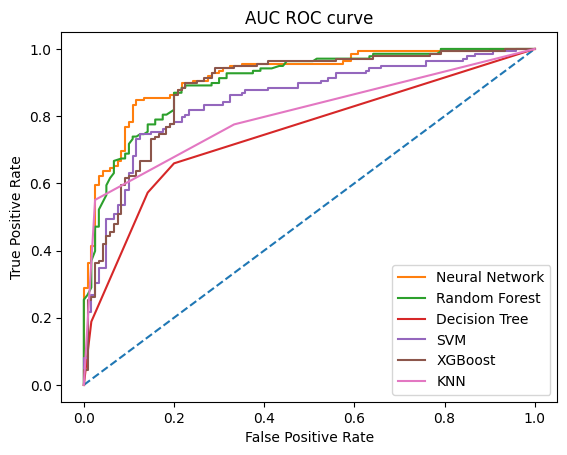

In [61]:
# all model AUC ROC curve
# predict probabilities
probs1 = saved_model.predict(X_test)
probs2 = rf.predict_proba(X_test)[:,1]
probs3 = dt2.predict_proba(X_test)[:,1]
probs4 = svc.decision_function(X_test)
probs5 = xg.predict_proba(X_test)[:,1]
probs6 = knn.predict_proba(X_test)[:,1]
# keep probabilities for both out comes
probs1 = probs1[:, 0]

# calculate AUC
auc1 = roc_auc_score(y_test, probs1)
auc2 = roc_auc_score(y_test, probs2)
auc3 = roc_auc_score(y_test, probs3)
auc4 = roc_auc_score(y_test, probs4)
auc5 = roc_auc_score(y_test, probs5)
auc6 = roc_auc_score(y_test, probs6)
print('AUC1: %.3f' % auc1)
print('AUC2: %.3f' % auc2)
print('AUC3: %.3f' % auc3)
print('AUC4: %.3f' % auc4)
print('AUC5: %.3f' % auc5)
print('AUC6: %.3f' % auc6)
# calculate roc curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, probs4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, probs5)
fpr6, tpr6, thresholds6 = roc_curve(y_test, probs6)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr1, tpr1,label='Neural Network')
plt.plot(fpr2, tpr2,label='Random Forest')
plt.plot(fpr3, tpr3,label='Decision Tree')
plt.plot(fpr4, tpr4,label='SVM')
plt.plot(fpr5, tpr5,label='XGBoost')
plt.plot(fpr6, tpr6,label='KNN')
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('AUC ROC curve')
plt.legend()
# show the plot
plt.show()






 The work flow is as follows:
1. The data is pre-processed to remove the outliers.
2. The data is balanced using the SMOTE method.
3. The data is then split into train and test sets.
4. The train set is used to train the model and the test set is used to evaluate the model.
The data contained features that were not important for the model. These features were dropped using the chi square test, correlation matrix and feature importance.

## RESULTS
The results obtained from the models 